# Projeto Final Ciência dos Dados

### Alunos:   
Victor Jurdi

Matheus Amaral

In [17]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from math import *
import numpy as np
from scipy.stats import norm, probplot
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

## Introdução

O objeivo deste projeto é analisar o dataset do jogo FIFA19, onde se encontra todos os atributos dos jogadores, e a partir desses e de técnicas de machine learining, como regressão e clusterização, prever o preço do jogador no mercado virtual.

O dataset foi extraido do link: https://www.kaggle.com/karangadiya/fifa19

## Leitura dos dados

In [18]:
dt = pd.read_csv("data.csv")

dt.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Limpando o arquivo (removendo as variáveis que não serão utilizadas nas análises)

In [19]:
dt1= dt.drop(columns=['Unnamed: 0','ID', 'Photo', 'Flag', 'Club Logo', 'Body Type', 'LS', 'ST', 'RS', 'LW', 'RW', 'LF', 'CF', 'RF', 'LAM', 'RAM', 'CAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']).fillna(0)
dt1.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [20]:
valor=[]
for e in dt1['Value']:
    if 'M' in e: 
        M=float(e.replace('M','')[1:])*1000000
        valor.append(M)
    elif 'K' in e:
        K=float(e.replace('K',"")[1:])*1000
        valor.append(K)
    else:
        E=float(e.replace('€',''))
        valor.append(E)

wage = []
for f in dt1['Wage']:
    if 'M' in f: 
        M=float(f.replace('M','')[1:])*1000000
        wage.append(M)
    elif 'K' in f:
        K=float(f.replace('K',"")[1:])*1000
        wage.append(K)
    else:
        E=float(f.replace('€',''))
        wage.append(E)
        
rc = []
for g in dt1['Wage']:
    if 'M' in g: 
        M=float(g.replace('M','')[1:])*1000000
        rc.append(M)
    elif 'K' in g:
        K=float(g.replace('K',"")[1:])*1000
        rc.append(K)
    else:
        E=float(g.replace('€',''))
        rc.append(E)

dt1['value'] = valor
dt1['wage'] = wage
dt1['release clause'] = rc
dt2 = dt1.drop(columns=['Value', 'Wage', 'Release Clause'])
dt2.head()

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,value,wage,release clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500000.0,565000.0,565000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,Right,5.0,4.0,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000.0,405000.0,405000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,5.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500000.0,290000.0,290000.0
3,De Gea,27,Spain,91,93,Manchester United,1471,Right,4.0,3.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000.0,260000.0,260000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,Right,4.0,5.0,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000.0,355000.0,355000.0


Taxa de correlação:
0.6270852347261975


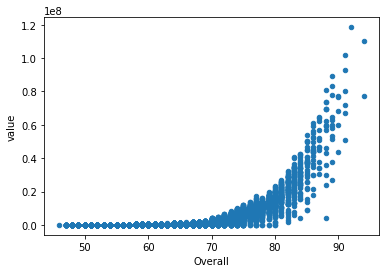

In [21]:
dt2.plot.scatter(x='Overall',y='value')
correlacao = dt2['Overall'].corr(dt2['value'])
print('Taxa de correlação:')
print(correlacao)

O preço de mercado dos jogadores aumenta exponecialmente conforme seu Overall, e a correlação entre estes é considerável, portanto podemos considerar esta análise.

Taxa de correlação:
0.649007182702698


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8B7B429B0>,
      dtype=object)

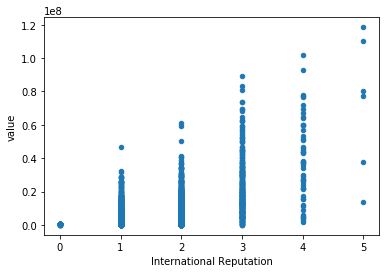

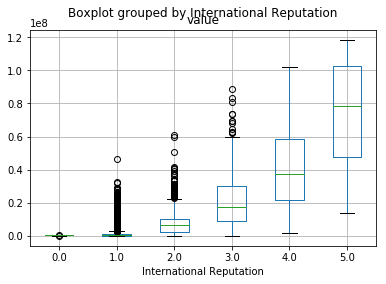

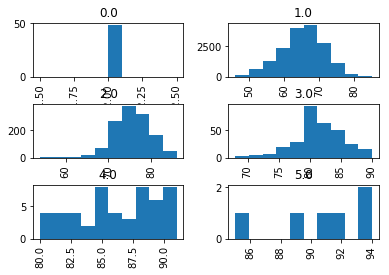

In [22]:
dt2.plot.scatter(x='International Reputation',y='value')
correlacao = dt2['International Reputation'].corr(dt2['value'])
print('Taxa de correlação:')
print(correlacao)
dt2.boxplot(column="value", by='International Reputation')
dt2.hist(column="Overall", by='International Reputation')

A partir dos gráficos acima, conclui-se que a reputação internacional dos jogadores é um fator importante para o preço deste visto que conforme aumenta o nível da reputação, os jogadores ficam tanto com Overall maior, quanto com preço maior.

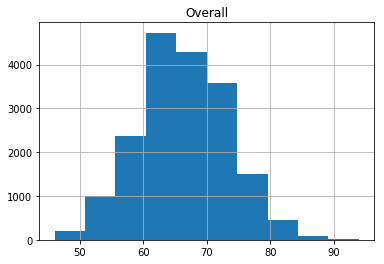

In [23]:
dt2.hist(column="Overall");

A maior parte dos jogadores estão entre 60 e 70 de Overall.

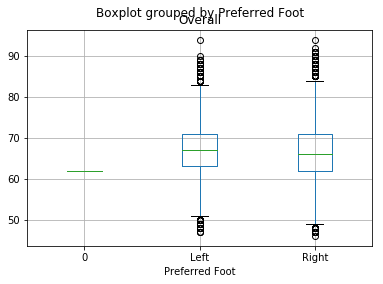

In [24]:
dt2.boxplot(column="Overall", by='Preferred Foot')

A mediana de Overall dos jogadores canhotos é levemente mais alta que dos jogadores destros, porém o valor máximo tirando outliers dos destros é maior.

Taxa de correlação:
0.07502220683279798


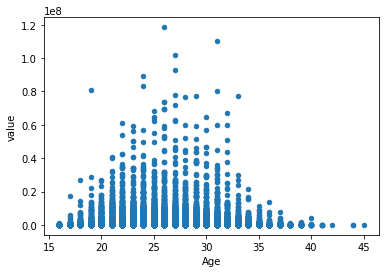

In [25]:
dt2.plot.scatter(x='Age',y='value')
correlacao = dt2['Age'].corr(dt2['value'])
print('Taxa de correlação:')
print(correlacao)

Jogadores com valor de mercado mais alto (outliers) estão na faixa dos 22 a 33 anos, porém como a taxa de correlação entre a idade dos jogadores e seu valor é baixa, indica que o valor do jogador independe de sua idade.

In [26]:
atributos = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'value', 'wage', 'release clause']
atr = dt2.loc[:, atributos]
atr.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,value,wage,release clause
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500000.0,565000.0,565000.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000.0,405000.0,405000.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500000.0,290000.0,290000.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000.0,260000.0,260000.0
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000.0,355000.0,355000.0


In [27]:
corr = atr.corr
corr

<bound method DataFrame.corr of        Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0          84.0       95.0             70.0          90.0     86.0       97.0   
1          84.0       94.0             89.0          81.0     87.0       88.0   
2          79.0       87.0             62.0          84.0     84.0       96.0   
3          17.0       13.0             21.0          50.0     13.0       18.0   
4          93.0       82.0             55.0          92.0     82.0       86.0   
5          81.0       84.0             61.0          89.0     80.0       95.0   
6          86.0       72.0             55.0          93.0     76.0       90.0   
7          77.0       93.0             77.0          82.0     88.0       87.0   
8          66.0       60.0             91.0          78.0     66.0       63.0   
9          13.0       11.0             15.0          29.0     13.0       12.0   
10         62.0       91.0             85.0          83.0     89.0       85.0

In [28]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [31]:
Y = atr['value']
X = atr[['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'wage', 'release clause']]
results3 = regress(X, Y)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1663.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:05:46   Log-Likelihood:            -2.9565e+05
No. Observations:               18207   AIC:                         5.914e+05
Df Residuals:                   18171   BIC:                         5.917e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.717e+06   2.35e+05    -20.072      0.000   -5.18e+06   -4.26e+06
Crossing        -2.163e+04   2720.075     -7.953      0.000    -2.7e+04   -1.63e+04
Finishing        1.562e+04   3434.857      4.548      0.000    8887.782    2.24e+04
HeadingAccuracy   -41.3703   2859.755     -0.014      0.988   -5646.760    5564.020
ShortPassing     1.979e+04   4875.381      4.060      0.000    1.02e+04    2.94e+04
Volleys          5804.2569   2976.576      1.950      0.051     -30.114    1.16e+04
Dribbling        1.231e+04   4286.691      2.872      0.004    3907.720    2.07e+04
Curve            1150.4024   2935.779      0.392      0.695   -4604.002    6904.807
FKAccuracy       1.114e+04   2595.217      4.293      0.000    6054.405    1.62e+04
LongPassing      4853.0430   3583.759      1.354      0.176   -2171.464    1.19e+04
BallControl      8359.2069   5246.765      1.593      0.111   -1924.949    1.86e+04
Acceleration     2.056e+04   4052.345      5.075      0.000    1.26e+04    2.85e+04
SprintSpeed      6940.1916   3762.159      1.845      0.065    -433.996    1.43e+04
Agility         -1.434e+04   3011.495     -4.763      0.000   -2.02e+04   -8441.747
Reactions        7.309e+04   4033.097     18.122      0.000    6.52e+04     8.1e+04
Balance          -1.56e+04   2632.111     -5.928      0.000   -2.08e+04   -1.04e+04
ShotPower       -5840.8496   3048.170     -1.916      0.055   -1.18e+04     133.852
Jumping         -5581.7409   2129.467     -2.621      0.009   -9755.698   -1407.784
Stamina          1.728e+04   2465.764      7.007      0.000    1.24e+04    2.21e+04
Strength        -1.386e+04   2490.692     -5.563      0.000   -1.87e+04   -8973.030
LongShots       -1.029e+04   3235.564     -3.181      0.001   -1.66e+04   -3949.981
Aggression      -9311.3401   2264.645     -4.112      0.000   -1.38e+04   -4872.422
Interceptions   -1.087e+04   3268.648     -3.324      0.001   -1.73e+04   -4458.186
Positioning     -1.261e+04   3197.425     -3.944      0.000   -1.89e+04   -6344.375
Vision           7338.2831   2963.985      2.476      0.013    1528.592    1.31e+04
Penalties       -2.179e+04   2804.745     -7.770      0.000   -2.73e+04   -1.63e+04
Composure         1.42e+04   3197.589      4.441      0.000    7931.623    2.05e+04
Marking          7096.0864   2620.465      2.708      0.007    1959.727    1.22e+04
StandingTackle   1.907e+04   4891.681      3.897      0.000    9477.070    2.87e+04
SlidingTackle   -2.423e+04   4533.216     -5.345      0.000   -3.31e+04   -1.53e+04
GKDiving         6830.4954   6112.052      1.118      0.264   -5149.705    1.88e+04
GKHandling      -4680.8153   6178.221     -0.758      0.449   -1.68e+04    7429.082
GKKicking        1946.9865   5701.104      0.342      0.733   -9227.716    1.31e+04
GKPositioning    -231.1502   6047.068     -0.038      0.970

In [38]:
X1 = atr[['Crossing', 'Finishing', 'ShortPassing', 'Volleys',
       'Dribbling', 'FKAccuracy','Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'wage', 'release clause']]
results2 = regress(X1, Y)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     2237.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:51:26   Log-Likelihood:            -2.9566e+05
No. Observations:               18207   AIC:                         5.914e+05
Df Residuals:                   18180   BIC:                         5.916e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.454e+06   2.12e+05    -21.046      0.000   -4.87e+06   -4.04e+06
Crossing       -2.011e+04   2591.590     -7.760      0.000   -2.52e+04    -1.5e+04
Finishing       1.448e+04   3383.210      4.281      0.000    7853.307    2.11e+04
ShortPassing    2.401e+04   3652.116      6.574      0.000    1.68e+04    3.12e+04
Volleys         5087.5376   2919.366      1.743      0.081    -634.695    1.08e+04
Dribbling       1.278e+04   3699.262      3.455      0.001    5529.094       2e+04
FKAccuracy      1.201e+04   2350.054      5.112      0.000    7406.245    1.66e+04
Acceleration    2.039e+04   4044.275      5.041      0.000    1.25e+04    2.83e+04
SprintSpeed     6356.2177   3754.337      1.693      0.090   -1002.637    1.37e+04
Agility        -1.343e+04   2982.703     -4.501      0.000   -1.93e+04   -7580.185
Reactions       7.901e+04   3387.003     23.328      0.000    7.24e+04    8.57e+04
Balance        -1.545e+04   2597.753     -5.949      0.000   -2.05e+04   -1.04e+04
ShotPower      -5675.8207   3013.443     -1.884      0.060   -1.16e+04     230.813
Jumping        -5559.8939   2048.454     -2.714      0.007   -9575.057   -1544.731
Stamina          1.63e+04   2447.936      6.661      0.000    1.15e+04    2.11e+04
Strength       -1.327e+04   2402.172     -5.526      0.000    -1.8e+04   -8565.460
LongShots      -9167.0450   3207.224     -2.858      0.004   -1.55e+04   -2880.582
Aggression     -1.024e+04   2235.880     -4.581      0.000   -1.46e+04   -5861.126
Interceptions  -1.074e+04   3258.542     -3.297      0.001   -1.71e+04   -4355.605
Positioning    -1.458e+04   3120.286     -4.673      0.000   -2.07e+04   -8464.774
Vision          1.074e+04   2713.399      3.959      0.000    5423.898    1.61e+04
Penalties      -2.317e+04   2714.749     -8.533      0.000   -2.85e+04   -1.78e+04
Composure       1.567e+04   3143.615      4.984      0.000    9505.006    2.18e+04
Marking         6016.6017   2581.307      2.331      0.020     956.996    1.11e+04
StandingTackle   1.81e+04   4879.087      3.709      0.000    8533.636    2.77e+04
SlidingTackle  -2.427e+04   4517.701     -5.371      0.000   -3.31e+04   -1.54e+04
wage              99.3964      0.532    186.790      0.000      98.353     100.439
release clause    99.3964      0.532    186.790      0.000      98.353     100.439
==============================================================================
Omnibus:                    17581.716   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2817135.888
Skew:                           4.264   Prob(JB):                         0.00
Kurtosis:                      63.339   Cond. No.                     1.09e+16
==============================================================================

Warnings:
[1] Standard Errors assum

In [44]:
C = results2.params['const']
a = results2.params["Crossing"]
b = results2.params["Finishing"]
c = results2.params["ShortPassing"]
d = results2.params["Volleys"]
e = results2.params['Dribbling']
f = results2.params['FKAccuracy']
g = results2.params['Acceleration']
h = results2.params['SprintSpeed']
i = results2.params['Agility']
j = results2.params['Reactions']
k = results2.params['Balance']
l = results2.params['ShotPower']
m = results2.params['Jumping']
n = results2.params['Stamina']
o = results2.params['Strength']
p = results2.params['LongShots']
q = results2.params['Aggression']
r = results2.params['Interceptions']
s = results2.params['Positioning']
t = results2.params['Vision']
u = results2.params['Penalties']
v = results2.params['Composure']
w = results2.params['Marking']
x = results2.params['StandingTackle']
y = results2.params['SlidingTackle']
z = results2.params['wage']
a1 = results2.params['release clause']

def f(x1, x2):
    return C+b*x1 + w*x2

npoints = 100
x1 = np.linspace(X1["Finishing"].min(), X1["Finishing"].max(), npoints)
x2 = np.linspace(X1["wage"].min(), X1["wage"].max(), npoints)

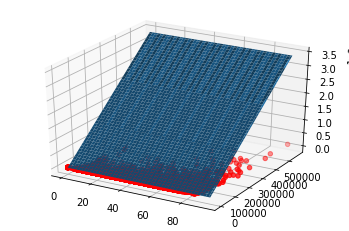

In [45]:
x1_xx, x2_yy = np.meshgrid(x1, x2)
z = f(x1_xx, x2_yy)
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(x1_xx, x2_yy, z)
plt3d.scatter(X1["Finishing"], X1["wage"], Y , color="r");